In [1]:
import linearreg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class PolynomialRegression:
    def __init__(self,degree):
        self.degree = degree
        self.w_ = None
    
    def fit(self,x,y):
        x_pow = []
        XX = x.reshape(len(x),1)
        for i in range(1,self.degree + 1):
            x_pow.append(XX ** i)
        mat = np.concatenate(x_pow,axis=1)
        linreg = linearreg.LinearRegression()
        linreg.fit(mat,y)
        self.w_ = linreg.w_
    
    def predict(self,x):
        r = 0
        for i in range(self.degree + 1):
            r += x**i *self.w_[i]
        return r


In [3]:
# データ生成
np.random.seed(0)
n = 8
def f(x):
    return 1 + 2*x
x = np.random.random(n)*10
y = f(x) + np.random.randn(n)

In [4]:
# 多項式回帰
model = PolynomialRegression(10)
model.fit(x,y)

c:\Users\furuki_all\python_env\env_conda_base\linearreg.py:15: LinAlgWarning: Ill-conditioned matrix (rcond=6.67351e-32): result may not be accurate.
  self.w_ = linalg.solve(A,b)


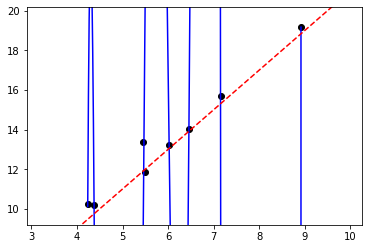

In [6]:
# 可視化
plt.scatter(x,y,color='k')
plt.ylim([y.min()-1,y.max()+1])
xx = np.linspace(x.min(),x.max(),300)
yy = np.array([model.predict(u) for u in xx])
plt.plot(xx,yy,color='blue')
x1 = x.min()-1
x2 = x.max()+1
plt.plot([x1,x2],[f(x1),f(x2)],color='red',ls='dashed')